# Problem Statement
Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.


The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon.

The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.


In [1]:
#Importing important library
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline  

In [2]:
#Reading the dataset
df=pd.read_csv('Data/ex1data2.txt',header=None)
print(df.shape)
print(df.head())

(47, 3)
      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


In [3]:
#Reshaping
X=np.array(df.iloc[:,:df.shape[1]-1])
y=np.array(df.iloc[:,df.shape[1]-1])
y=y.astype(float)

print("X shape ",X.shape)
print("Y shape ",y.shape)

X shape  (47, 2)
Y shape  (47,)


In [4]:
#feature normalization
def feature_normalize(X):
    #column wise mean
    X_mean=np.mean(X,axis=0)
    #column wise standard deviation
    X_std=np.std(X,axis=0)
    X_norm=(X-X_mean)/X_std
    return X_norm,X_mean,X_std

In [5]:
X_norm,X_mean,X_std=feature_normalize(X)
print("Computed mean ",X_mean)
print("Computer Standard deviation",X_std)

Computed mean  [2000.68085106    3.17021277]
Computer Standard deviation [7.86202619e+02 7.52842809e-01]


In [6]:
print("Number of training examples : ",X.shape[0])

Number of training examples :  47


In [7]:
def costfunction(X,y,theta):
    m=X.shape[0]
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [8]:
def gradientdescent(X,y,theta,alpha,epoch):
    J=[]
    m=X.shape[0]
    
    for i in range(epoch):
        theta=theta-(alpha/m)*(np.dot(X,theta)-y).dot(X)
        J.append(costfunction(X,y,theta))
   
    return J,theta

# Work only on X (not normalize)

In [9]:
#Reshaping X and Concatenate 1 for bias handling
X=np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1),X),axis=1)

In [10]:
print("X size after concatenation ",X.shape)

X size after concatenation  (47, 3)


In [11]:
# further testing of the cost function without normalization
alpha=0.1
epochs=400

print("Number of features : ",X.shape[1]-1," . But X total size with bias add : ",X.shape[1])
J,theta = gradientdescent(X, y,np.zeros(X.shape[1]),alpha,epochs)
print("Theta value : ",theta)

Number of features :  2  . But X total size with bias add :  3
Theta value :  [nan nan nan]


/home/jo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


# Work only on X_norm (Normalize)

In [12]:
# further testing of the cost function with normalization

#Reshaping X and Concatenate 1
X_norm=np.concatenate((np.ones(X_norm.shape[0]).reshape(X_norm.shape[0],1),X_norm),axis=1)
print("Number of features : ",X.shape[1]-1," . But X total size with bias add : ",X.shape[1])

In [13]:
X_norm[0:5,0:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [18]:
# further testing of the cost function without normalization
alpha=0.1
epochs=400
J,theta = gradientdescent(X_norm, y,np.zeros(X_norm.shape[1]),alpha,epochs)
print("With epoch ",epochs," And learning rate ",alpha," ,Theta value : ",theta)

With epoch  400  And learning rate  0.1  ,Theta value :  [340412.65957447 109447.79558639  -6578.3539709 ]


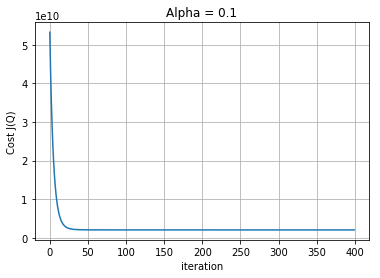

In [19]:
def plotting(J,alpha):
    pyplot.figure()
    pyplot.title("Alpha = "+str(alpha))
    pyplot.plot(J)
    pyplot.grid()
    pyplot.xlabel("iteration")
    pyplot.ylabel("Cost J(Q)")
    
plotting(J,0.1)

In [24]:
print("Optimal theta {1} after {0}".format(epochs,theta))

Optimal theta [340412.65957447 109447.79558639  -6578.3539709 ] after 400


/home/jo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jo/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


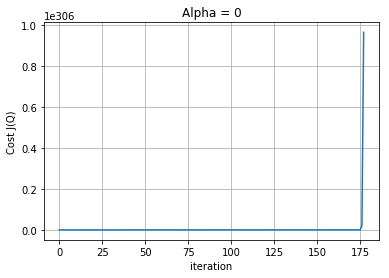

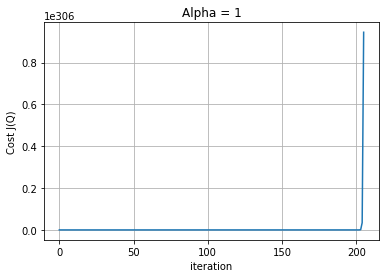

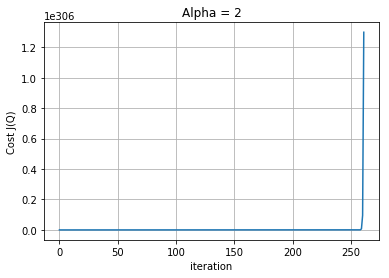

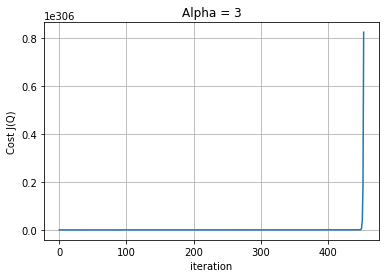

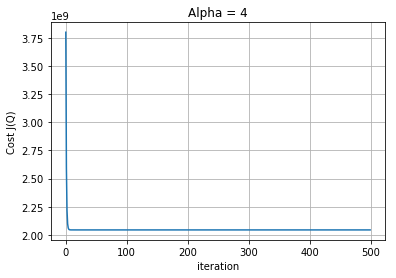

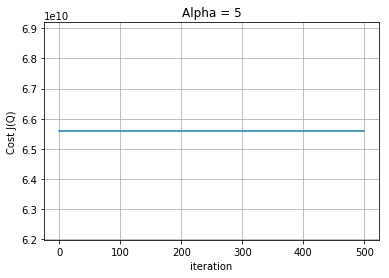

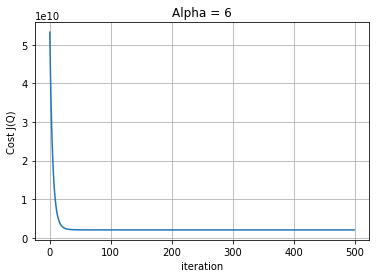

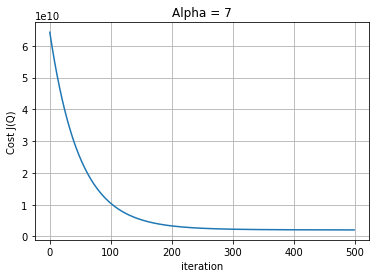

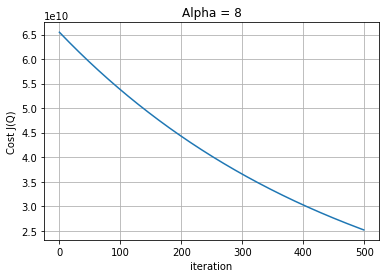

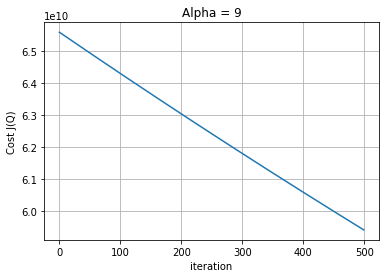

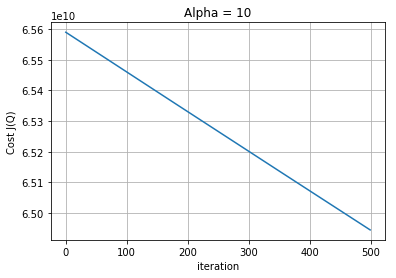

In [25]:
#Experiment with learning rate

alphas=[5.0,4.0,3.0,2.0,1.0,0.0,0.1,0.01,0.001,0.0001,0.00001]
for i in range(len(alphas)):
    J,theta=gradientdescent(X_norm,y,np.zeros(X.shape[1]),alphas[i],500)
    plotting(J,i)